# Import of data set and tools

In [ ]:
# Dataset source(s):
  # https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees
  # https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df_initial = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')

# Data Understanding

## Attribute Types

In [ ]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df_initial.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
524,1/31/2015,Quarter5,finishing,Saturday,1,0.75,3.94,NaN,1800,0,0.0,0,0,15.0,0.971867
287,1/17/2015,Quarter3,sweing,Saturday,1,0.80,48.68,171.0,10620,63,0.0,0,0,59.0,0.800117
700,2/10/2015,Quarter2,sweing,Tuesday,12,0.80,15.26,900.0,4080,50,0.0,0,0,34.0,0.800402
36,1/3/2015,Quarter1,sweing,Saturday,4,0.70,23.69,544.0,13800,0,0.0,0,0,60.0,0.700134
792,2/16/2015,Quarter3,finishing,Monday,6,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.773333
1186,3/11/2015,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.750051
528,1/31/2015,Quarter5,finishing,Saturday,7,0.70,3.94,NaN,1200,0,0.0,0,0,10.0,0.971867
189,1/11/2015,Quarter2,finishing,Sunday,6,0.80,2.90,NaN,1440,0,0.0,0,0,8.0,0.597348
926,2/25/2015,Quarter4,finishing,Wednesday,10,0.70,2.90,NaN,1200,0,0.0,0,0,10.0,0.845833
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983


# Data Preparation

## Converting object data types

In [ ]:
df_convertedDataTypes = df_initial.convert_dtypes()
df_convertedDataTypes['date'] = pd.to_datetime(df_convertedDataTypes.date)
df_convertedDataTypes['day'] = df_convertedDataTypes.date.dt.weekday

In [ ]:
df_convertedDataTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   string        
 2   department             1197 non-null   string        
 3   day                    1197 non-null   int64         
 4   team                   1197 non-null   Int64         
 5   targeted_productivity  1197 non-null   Float64       
 6   smv                    1197 non-null   Float64       
 7   wip                    691 non-null    Int64         
 8   over_time              1197 non-null   Int64         
 9   incentive              1197 non-null   Int64         
 10  idle_time              1197 non-null   Float64       
 11  idle_men               1197 non-null   Int64         
 12  no_of_style_change     1197 non-null   Int64         
 13  no_

In [ ]:
df_convertedDataTypes.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
319,2015-01-19,Quarter3,finishing,0,9,0.8,3.94,<NA>,1800,0,0.0,0,0,10.0,0.964106
815,2015-02-17,Quarter3,finishing,1,4,0.75,5.13,<NA>,960,0,0.0,0,0,8.0,0.656667
373,2015-01-22,Quarter4,sweing,3,4,0.75,22.52,759,10080,81,0.0,0,0,56.0,0.849984
466,2015-01-27,Quarter4,finishing,1,7,0.5,4.15,<NA>,960,0,0.0,0,0,8.0,0.803542
164,2015-01-10,Quarter2,sweing,5,3,0.75,19.87,1075,7080,45,0.0,0,0,56.0,0.750098
837,2015-02-18,Quarter3,finishing,2,10,0.8,3.94,<NA>,960,0,0.0,0,0,8.0,0.64025
970,2015-02-28,Quarter4,sweing,5,3,0.75,29.4,1144,4440,45,0.0,0,2,57.0,0.750717
240,2015-01-14,Quarter2,sweing,2,7,0.8,25.9,1150,10170,70,0.0,0,0,56.5,0.900145
996,2015-03-01,Quarter1,sweing,6,11,0.8,11.61,347,0,50,4.0,20,0,57.0,0.682433
781,2015-02-15,Quarter3,sweing,6,3,0.6,30.1,1361,6960,30,0.0,0,1,58.0,0.475718


# Data Understanding cont.

## Statistical Properties

In [ ]:
df_convertedDataTypes.drop(['team'], axis=1).describe()

,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2.812865,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,2.112252,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,1.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,5.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,6.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
df_convertedDataTypes.corr()

,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
day,1.000000,-0.011927,0.029671,-0.007079,-0.137731,0.038046,-0.105458,0.032969,0.025031,-0.026198,-0.016574,0.000030
team,-0.011927,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.029671,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.007079,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.137731,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,0.038046,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.105458,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.032969,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.025031,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.026198,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366


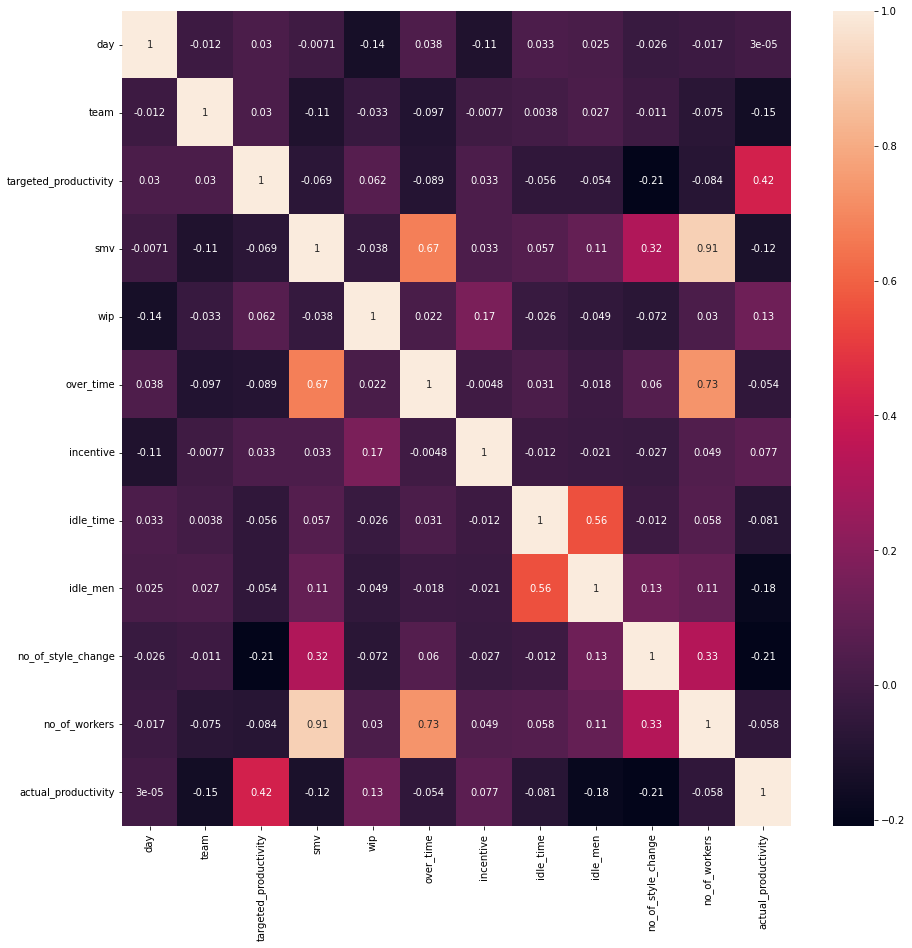

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_convertedDataTypes.corr(), annot = True)

## Data Quality Analysis

### Completeness

In [ ]:
# Calculate the percentage of missing values for each column
missing_values = df_convertedDataTypes.isnull().sum() / len(df_convertedDataTypes) * 100

# Drops the columns that don't have any missing values and sorts the remaining column's missing values in descending order
missing_values = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)

# Print the percentage of missing values
print(missing_values)

wip    42.272348
dtype: float64


### Duplicated rows

In [ ]:
duplicate_rows = df_convertedDataTypes[df_convertedDataTypes.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


### Inconsistencies of data representation

In [ ]:
for col in df_convertedDataTypes:
  if df_convertedDataTypes.dtypes[col] == 'string':
    print(col + ':')
    print(df_convertedDataTypes[col].value_counts())
    print()

quarter:
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: Int64

department:
sweing        691
finishing     257
finishing     249
Name: department, dtype: Int64



# Data Preparation cont.

## Improving data quality 

### Handling of misleading column names

In [ ]:
# Rename the quarter into seven_day_interval
df_convertedDataTypes.rename(columns={'quarter': 'seven_day_interval'}, inplace=True)

### Handling of missing values
There are 506 missing values for the attribute *wip* (Work in progress. Includes the number of unfinished items for products). In this segment we handle them by replacing the NULL values with 0 indicating that no products are unfinished

(array([681.,   2.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   4.]),
 array([7.00000e+00, 2.31850e+03, 4.63000e+03, 6.94150e+03, 9.25300e+03,
        1.15645e+04, 1.38760e+04, 1.61875e+04, 1.84990e+04, 2.08105e+04,
        2.31220e+04]),
 <a list of 10 Patch objects>)

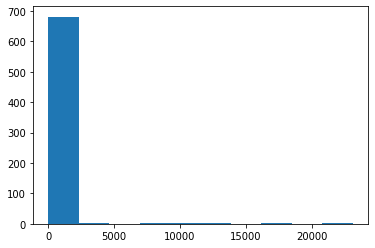

In [ ]:
plt.hist(df_initial['wip'])

The majority of all values in 'wip' is 0 => replace all null values with 0

In [ ]:
df_convertedDataTypes.isnull().sum()

date                       0
seven_day_interval         0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df_missingValuesHandled = df_convertedDataTypes.fillna({'wip': 0,})

In [ ]:
df_missingValuesHandled.isnull().sum()

date                     0
seven_day_interval       0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

### Handling of outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

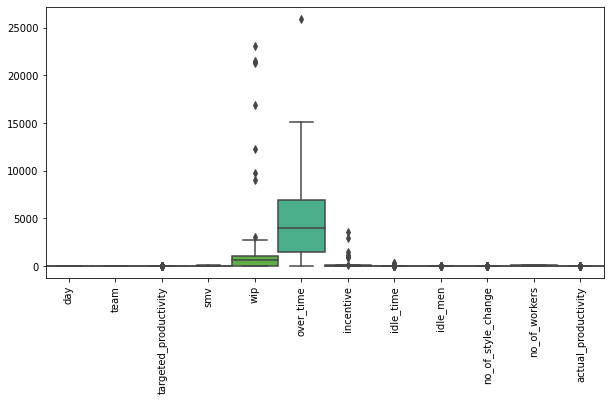

In [ ]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df_missingValuesHandled, orient ='v',width=1)
plt.xticks(rotation=90)

#### *over_time* outliers

In [ ]:
Q1 = df_missingValuesHandled.over_time.quantile(0.25)
Q3 = df_missingValuesHandled.over_time.quantile(0.75)
Q1, Q3

(1440, 6960)

In [ ]:
IQR = Q3 - Q1
IQR

5520

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-6840.0, 15240.0)

In [ ]:
# 143 different values for over_time
print(len(df_missingValuesHandled['over_time'].value_counts()))

print(dict((k, v) for k, v in df_missingValuesHandled['over_time'].value_counts().items() if k >upper_limit or k <lower_limit))

# Amount of outliers
sum(dict((k, v) for k, v in df_missingValuesHandled['over_time'].value_counts().items() if k >upper_limit or k <lower_limit).values())

143
{25920: 1}


1

In [ ]:
df_missingValuesHandled[(df_missingValuesHandled.over_time<lower_limit)|(df_missingValuesHandled.over_time>upper_limit)]

,date,seven_day_interval,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
146,2015-01-08,Quarter2,sweing,3,11,0.35,12.52,287,25920,38,0.0,0,0,54.0,0.349951


In [ ]:
# Save in the new df the values that lie in between [Q1, Q3]±1.5*IQR
df_overTimeOutliersHandled = df_missingValuesHandled[(df_missingValuesHandled.over_time>lower_limit)&(df_missingValuesHandled.over_time<upper_limit)]

New check of the boxplots after removing the outlier for the attribute *over_time*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

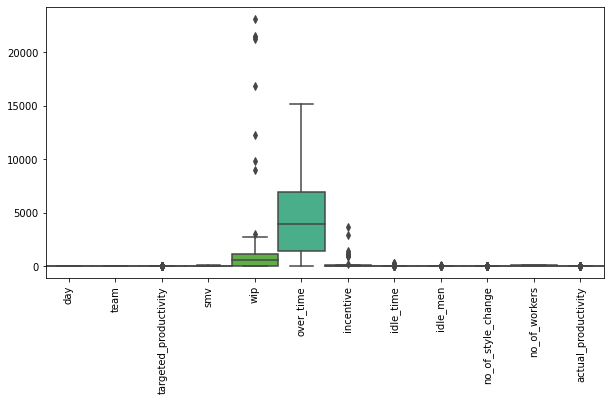

In [ ]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df_overTimeOutliersHandled, orient ='v',width=1)
plt.xticks(rotation=90)

#### wip outliers

In [ ]:
Q1 = df_overTimeOutliersHandled.wip.quantile(0.25)
Q3 = df_overTimeOutliersHandled.wip.quantile(0.75)
Q1, Q3

(0, 1083.25)

In [ ]:
IQR = Q3 - Q1
IQR

1083.25

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1624.875, 2708.125)

In [ ]:
# 549 different values for wip
print(len(df_overTimeOutliersHandled['wip'].value_counts()))

# key = value, value = amount of datapoints
print(dict((k, v) for k, v in df_overTimeOutliersHandled['wip'].value_counts().items() if k > upper_limit or k < lower_limit))

# Amount of outliers
sum(dict((k, v) for k, v in df_overTimeOutliersHandled['wip'].value_counts().items() if k > upper_limit or k < lower_limit).values())

549
{16882: 1, 21385: 1, 21266: 1, 12261: 1, 23122: 1, 8992: 1, 9792: 1, 2984: 1, 21540: 1}


9

In [ ]:
df_overTimeOutliersHandled[(df_overTimeOutliersHandled.wip<lower_limit)|(df_overTimeOutliersHandled.wip>upper_limit)]

,date,seven_day_interval,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,2015-02-02,Quarter1,sweing,0,1,0.8,22.94,16882,7020,113,0.0,0,0,58.5,1.000602
563,2015-02-02,Quarter1,sweing,0,2,0.8,22.52,21385,7020,88,0.0,0,0,58.5,0.900158
564,2015-02-02,Quarter1,sweing,0,3,0.8,22.52,21266,6840,70,0.0,0,0,57.0,0.900142
565,2015-02-02,Quarter1,sweing,0,10,0.8,22.52,21540,6720,88,0.0,0,0,56.0,0.90013
568,2015-02-02,Quarter1,sweing,0,12,0.8,15.26,12261,3600,63,0.0,0,0,35.0,0.800402
569,2015-02-02,Quarter1,sweing,0,4,0.8,22.52,23122,5940,50,0.0,0,0,56.5,0.800393
570,2015-02-02,Quarter1,sweing,0,9,0.75,29.12,8992,6960,55,0.0,0,0,58.0,0.799963
572,2015-02-02,Quarter1,sweing,0,11,0.7,20.55,9792,6480,60,0.0,0,0,54.0,0.700398
573,2015-02-02,Quarter1,sweing,0,6,0.7,18.79,2984,3960,30,0.0,0,0,33.0,0.700355


In [ ]:
df_wipOutliersHandled = df_overTimeOutliersHandled[(df_overTimeOutliersHandled.wip>lower_limit)&(df_overTimeOutliersHandled.wip<upper_limit)]

Rechecking the boxplots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

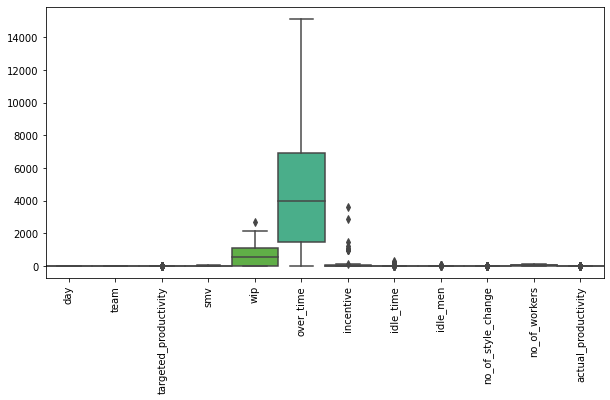

In [ ]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df_wipOutliersHandled, orient ='v',width=1)
plt.xticks(rotation=90)

#### *incentive* outliers

In [ ]:
Q1 = df_wipOutliersHandled.incentive.quantile(0.25)
Q3 = df_wipOutliersHandled.incentive.quantile(0.75)
Q1, Q3

(0, 50)

In [ ]:
IQR = Q3 - Q1
IQR

50

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-75.0, 125.0)

In [ ]:
# 48 different values for incentive
print(len(df_wipOutliersHandled['incentive'].value_counts()))

print(dict((k, v) for k, v in df_wipOutliersHandled['incentive'].value_counts().items() if k >upper_limit or k <lower_limit))

# Amount of outliers
sum(dict((k, v) for k, v in df_wipOutliersHandled['incentive'].value_counts().items() if k >upper_limit or k <lower_limit).values())

48
{960: 5, 138: 1, 1200: 1, 3600: 1, 2880: 1, 1440: 1, 1080: 1}


11

In [ ]:
df_wipOutliersHandled[(df_wipOutliersHandled.incentive<lower_limit)|(df_wipOutliersHandled.incentive>upper_limit)]

,date,seven_day_interval,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
730,2015-02-12,Quarter2,sweing,3,1,0.8,22.52,1397,0,138,0.0,0,0,57.0,1.100484
1128,2015-03-09,Quarter2,finishing,0,11,0.8,2.9,0,0,960,0.0,0,0,8.0,0.960625
1129,2015-03-09,Quarter2,finishing,0,12,0.8,4.6,0,0,1080,0.0,0,0,9.0,0.902963
1130,2015-03-09,Quarter2,finishing,0,5,0.6,3.94,0,0,2880,0.0,0,0,12.0,0.864343
1133,2015-03-09,Quarter2,finishing,0,9,0.75,2.9,0,0,3600,0.0,0,0,15.0,0.841
1137,2015-03-09,Quarter2,finishing,0,3,0.8,4.6,0,0,1440,0.0,0,0,12.0,0.795417
1138,2015-03-09,Quarter2,finishing,0,4,0.75,3.94,0,0,960,0.0,0,0,8.0,0.795388
1139,2015-03-09,Quarter2,finishing,0,1,0.75,3.94,0,0,960,0.0,0,0,8.0,0.794567
1143,2015-03-09,Quarter2,finishing,0,2,0.7,3.9,0,0,1200,0.0,0,0,10.0,0.6825
1148,2015-03-09,Quarter2,finishing,0,10,0.7,2.9,0,0,960,0.0,0,0,8.0,0.477292


In [ ]:
df_incentiveOutliersHandled = df_wipOutliersHandled[(df_wipOutliersHandled.incentive>lower_limit)&(df_wipOutliersHandled.incentive<upper_limit)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

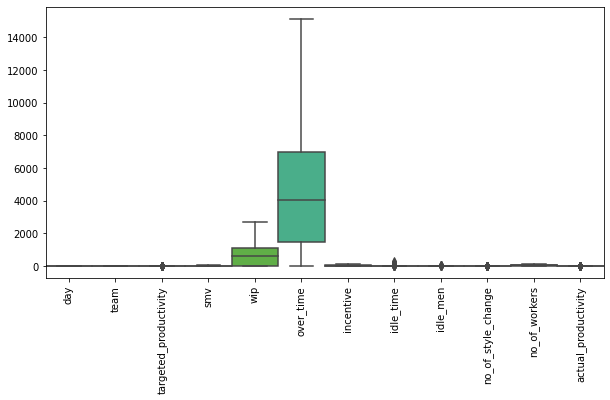

In [ ]:
plt.figure(figsize=(10,5))

# p = sns.boxplot(data = df_wipOutliersHandled.drop(['over_time'], axis=1), orient ='v',width=1)
p = sns.boxplot(data = df_incentiveOutliersHandled, orient ='v',width=1)

plt.xticks(rotation=90)

#### actual_productivity outliers

In [ ]:
print(sum(df_initial['actual_productivity'] > 1))
print(sum(df_wipOutliersHandled['actual_productivity'] > 1))
print(sum(df_incentiveOutliersHandled['actual_productivity'] > 1))


df_actual_productivity_handled = df_incentiveOutliersHandled[(df_incentiveOutliersHandled.actual_productivity<=1)]
min(df_actual_productivity_handled['actual_productivity']), max(df_actual_productivity_handled['actual_productivity'])

37
36
35


(0.233705476, 0.999995238)

### Handling of inconsistencies

####  *departement* inconsistency

In [ ]:
df_actual_productivity_handled['department'].value_counts()

sweing        657
finishing     253
finishing     231
Name: department, dtype: Int64

Remove the ending space char from the *finishing* value

In [ ]:
df_departmentInconsistencyHandled = df_actual_productivity_handled
df_departmentInconsistencyHandled['department'] = df_actual_productivity_handled['department'].replace('finishing ','finishing')
df_departmentInconsistencyHandled['department'] = df_actual_productivity_handled['department'].replace('sweing','sewing')
df_departmentInconsistencyHandled['department'].value_counts()

<ipython-input-45-3de10f0e5bc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_departmentInconsistencyHandled['department'] = df_actual_productivity_handled['department'].replace('finishing ','finishing')
<ipython-input-45-3de10f0e5bc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_departmentInconsistencyHandled['department'] = df_actual_productivity_handled['department'].replace('sweing','sewing')


sewing       657
finishing    484
Name: department, dtype: Int64

## Prepared data frame creation

In [ ]:
df_prepared = df_departmentInconsistencyHandled
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1141 non-null   datetime64[ns]
 1   seven_day_interval     1141 non-null   string        
 2   department             1141 non-null   string        
 3   day                    1141 non-null   int64         
 4   team                   1141 non-null   Int64         
 5   targeted_productivity  1141 non-null   Float64       
 6   smv                    1141 non-null   Float64       
 7   wip                    1141 non-null   Int64         
 8   over_time              1141 non-null   Int64         
 9   incentive              1141 non-null   Int64         
 10  idle_time              1141 non-null   Float64       
 11  idle_men               1141 non-null   Int64         
 12  no_of_style_change     1141 non-null   Int64         
 13  no_

## Adding derived attributes

In [ ]:
# Adding additional column that contains the percentage that the actual_productivity reaches of the targeted_productivity
# Adding additional column that contains the number of unfinished items per product divided by the number of workers in each team

# df_derivedAttributesAdded = df_prepared.assign(actual_productivity_norm=(df_prepared['actual_productivity']*df_prepared['targeted_productivity']),
#                 productivity_difference=(df_prepared['actual_productivity']*df_prepared['targeted_productivity'])-df_prepared['targeted_productivity'],
#                 items_per_worker=df_prepared['wip']/df_prepared['no_of_workers'])

df_derivedAttributesAdded = df_prepared.assign(productivity_difference=df_prepared['actual_productivity']-df_prepared['targeted_productivity'],
                                               items_per_worker=df_prepared['wip']/df_prepared['no_of_workers'])

df_derivedAttributesAdded.sample(10)

,date,seven_day_interval,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference,items_per_worker
1078,2015-03-05,Quarter1,sewing,3,1,0.7,26.82,1373,6960,50,0.0,0,0,58.0,0.750652,0.050652,23.672414
1011,2015-03-02,Quarter1,sewing,0,11,0.8,11.61,632,0,50,0.0,0,0,57.0,0.800309,0.000309,11.087719
616,2015-02-04,Quarter1,finishing,2,6,0.7,2.9,0,960,0,0.0,0,0,8.0,0.531667,-0.168333,0.0
982,2015-02-28,Quarter4,finishing,5,9,0.75,2.9,0,960,0,0.0,0,0,8.0,0.407813,-0.342187,0.0
52,2015-01-04,Quarter1,finishing,6,2,0.8,3.94,0,960,0,0.0,0,0,8.0,0.792104,-0.007896,0.0
111,2015-01-07,Quarter1,finishing,2,2,0.8,3.94,0,1440,0,0.0,0,0,8.0,0.813371,0.013371,0.0
905,2015-02-24,Quarter4,sewing,1,12,0.8,15.26,1062,4080,50,0.0,0,0,34.0,0.800402,0.000402,31.235294
670,2015-02-08,Quarter2,finishing,6,9,0.8,3.94,0,960,0,0.0,0,0,8.0,0.607417,-0.192583,0.0
1191,2015-03-11,Quarter2,sewing,2,7,0.65,30.48,935,6840,26,0.0,0,1,57.0,0.650596,0.000596,16.403509
71,2015-01-05,Quarter1,sewing,0,11,0.8,19.31,678,4800,50,0.0,0,0,55.0,0.800251,0.000251,12.327273


## Define categorical columns

In [ ]:
df_derivedAttributesAdded[["seven_day_interval", "department", "day", "team"]] = df_derivedAttributesAdded[["seven_day_interval", "department", "day", "team"]].apply(lambda x: x.astype("category"))
df_derivedAttributesAdded.sample(10)

,date,seven_day_interval,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference,items_per_worker
158,2015-01-10,Quarter2,sewing,5,4,0.8,28.08,660,10440,63,0.0,0,0,58.0,0.801028,0.001028,11.37931
191,2015-01-11,Quarter2,sewing,6,4,0.8,50.48,562,10440,0,0.0,0,0,58.0,0.473135,-0.326865,9.689655
621,2015-02-05,Quarter1,finishing,3,2,0.8,3.94,0,2640,0,0.0,0,0,22.0,0.999924,0.199924,0.0
592,2015-02-03,Quarter1,sewing,1,11,0.7,25.31,946,5760,60,0.0,0,0,54.0,0.700514,0.000514,17.518519
1019,2015-03-02,Quarter1,sewing,0,5,0.65,27.48,544,6720,34,0.0,0,0,56.0,0.700904,0.050904,9.714286
1142,2015-03-09,Quarter2,sewing,0,10,0.7,21.82,1576,6000,30,0.0,0,0,50.0,0.700422,0.000422,31.52
908,2015-02-24,Quarter4,finishing,1,8,0.7,4.6,0,960,0,0.0,0,0,8.0,0.791458,0.091458,0.0
649,2015-02-07,Quarter1,finishing,5,7,0.7,3.94,0,1200,0,0.0,0,0,10.0,0.715767,0.015767,0.0
454,2015-01-26,Quarter4,sewing,0,8,0.6,15.09,1519,360,23,0.0,0,0,52.0,0.600143,0.000143,29.211538
898,2015-02-23,Quarter4,sewing,0,10,0.7,21.25,1583,6000,0,0.0,0,1,50.0,0.417917,-0.282083,31.66


# Data understanding cont.

## Visual Exploration

### Histogram

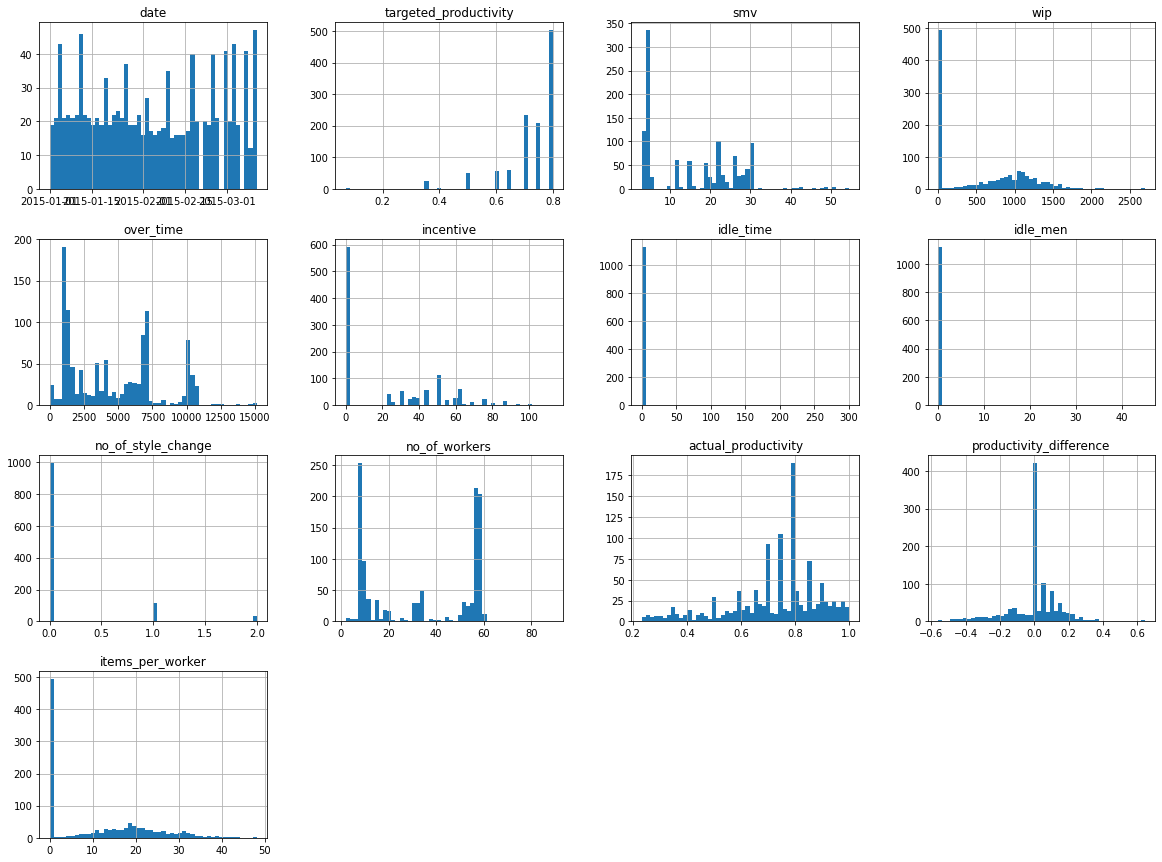

In [ ]:
# Create histograms for each variable
df_derivedAttributesAdded.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# df_incentiveOutliersHandled.set_index('date').plot()

### Scatterplot

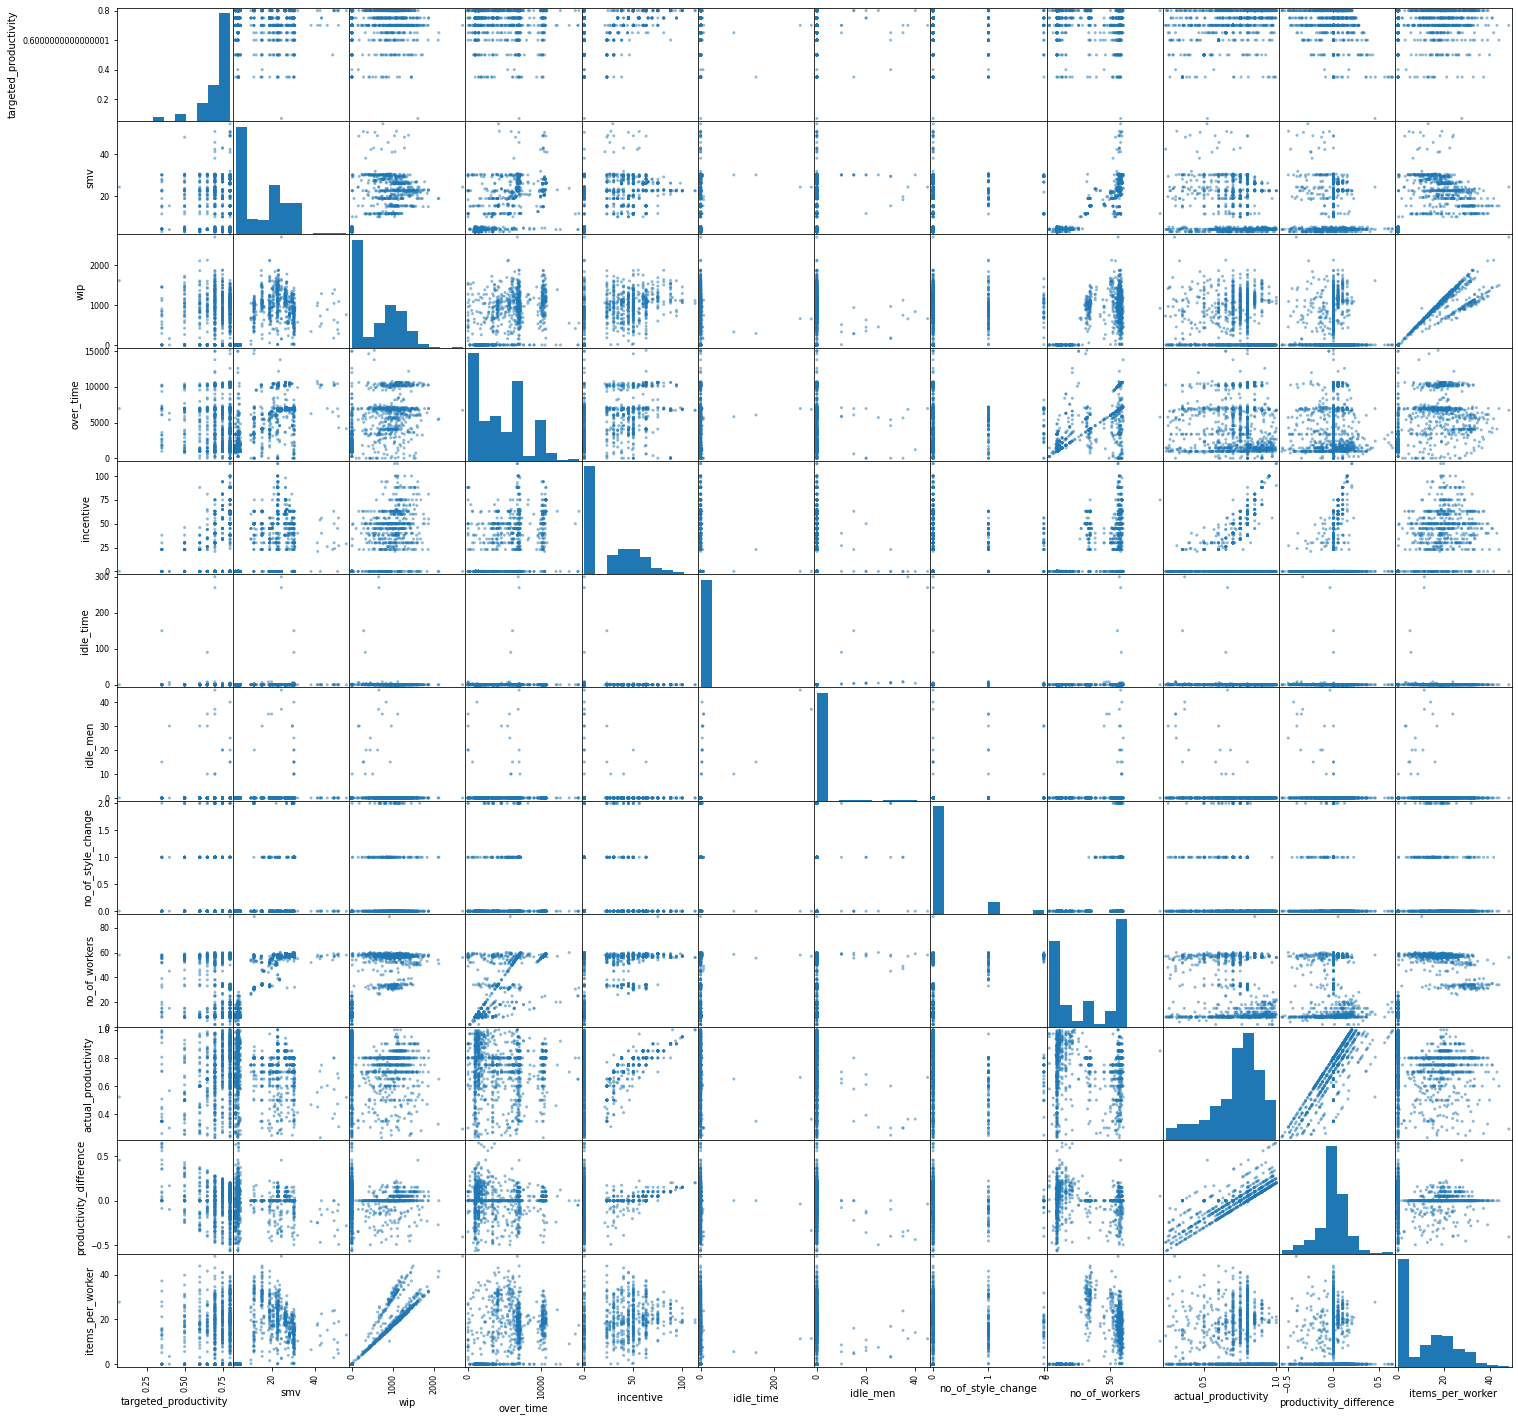

In [ ]:
# Import Scatter_Matrix function
from pandas.plotting import scatter_matrix

# Create a scatter matrix of all columns in the DataFrame
scatter_matrix(df_derivedAttributesAdded, figsize=(25,25))

# Show the plot
plt.show()


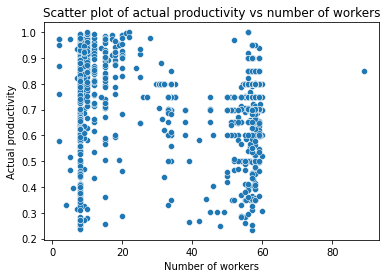

In [ ]:
# Create a scatter plot of the data with 'no_of_workers' on the x-axis
# and 'actual_productivity' on the y-axis
sns.scatterplot(x='no_of_workers', y='actual_productivity', data=df_derivedAttributesAdded)

# Add a title and labels to the plot
plt.title("Scatter plot of actual productivity vs number of workers")
plt.xlabel("Number of workers")
plt.ylabel("Actual productivity")

# Display the plot
plt.show()

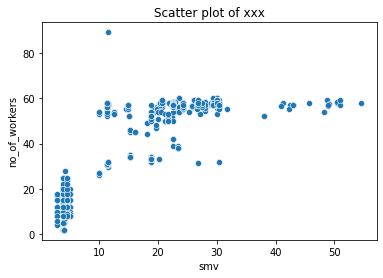

In [ ]:
# Create a scatter plot of the data with 'smv' on the x-axis
# and 'no_of_workers' on the y-axis
sns.scatterplot(x='smv', y='no_of_workers', data=df_convertedDataTypes)

# Add a title and labels to the plot
plt.title("Scatter plot of xxx")
plt.xlabel("smv")
plt.ylabel("no_of_workers")

# Display the plot
plt.show()

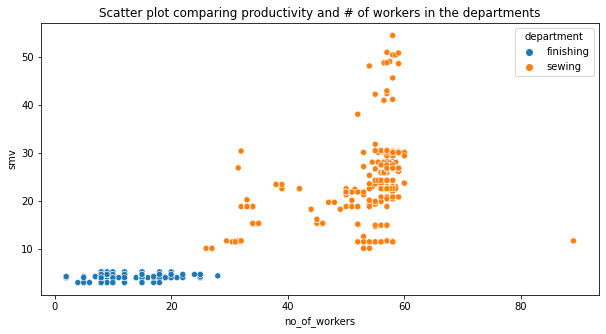

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Scatter plot comparing productivity and # of workers in the departments")
sns.scatterplot(data=df_derivedAttributesAdded, x="no_of_workers", y="smv", hue="department")

0.7999961904

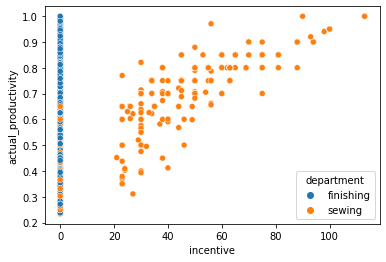

In [ ]:
sns.scatterplot(data=df_derivedAttributesAdded, x='incentive', y='actual_productivity', hue="department")
max(df_derivedAttributesAdded['targeted_productivity']) * max(df_derivedAttributesAdded['actual_productivity'])

### Productivity Comparison (actual vs target) in the company

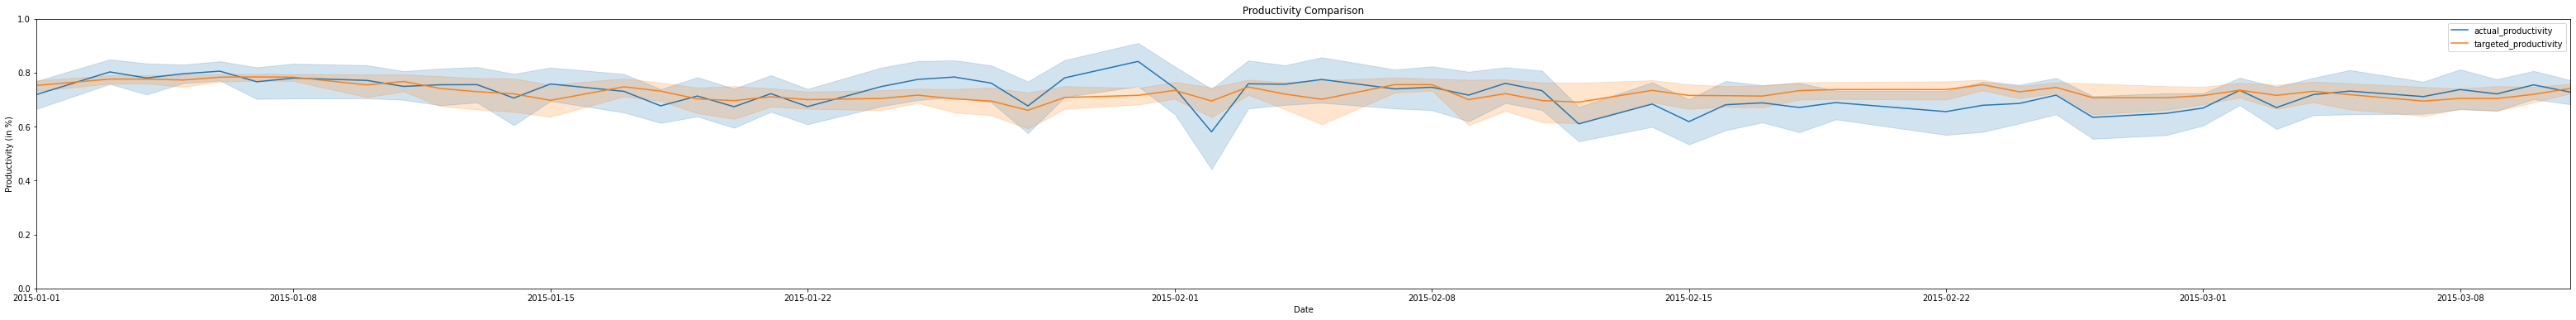

In [ ]:
plt.figure(figsize=(55, 6))
sns.lineplot(data=df_derivedAttributesAdded, x='date', y='actual_productivity', label='actual_productivity')
sns.lineplot(data=df_derivedAttributesAdded, x='date', y='targeted_productivity', label='targeted_productivity')

plt.title("Productivity Comparison")
plt.xlabel("Date")
plt.ylabel("Productivity (in %)")
plt.legend()
plt.ylim(0, 1)
plt.xlim(min(df_derivedAttributesAdded['date']), max(df_derivedAttributesAdded['date']))
plt.show()

### Productivity Comparison (actual vs target) in both Departments

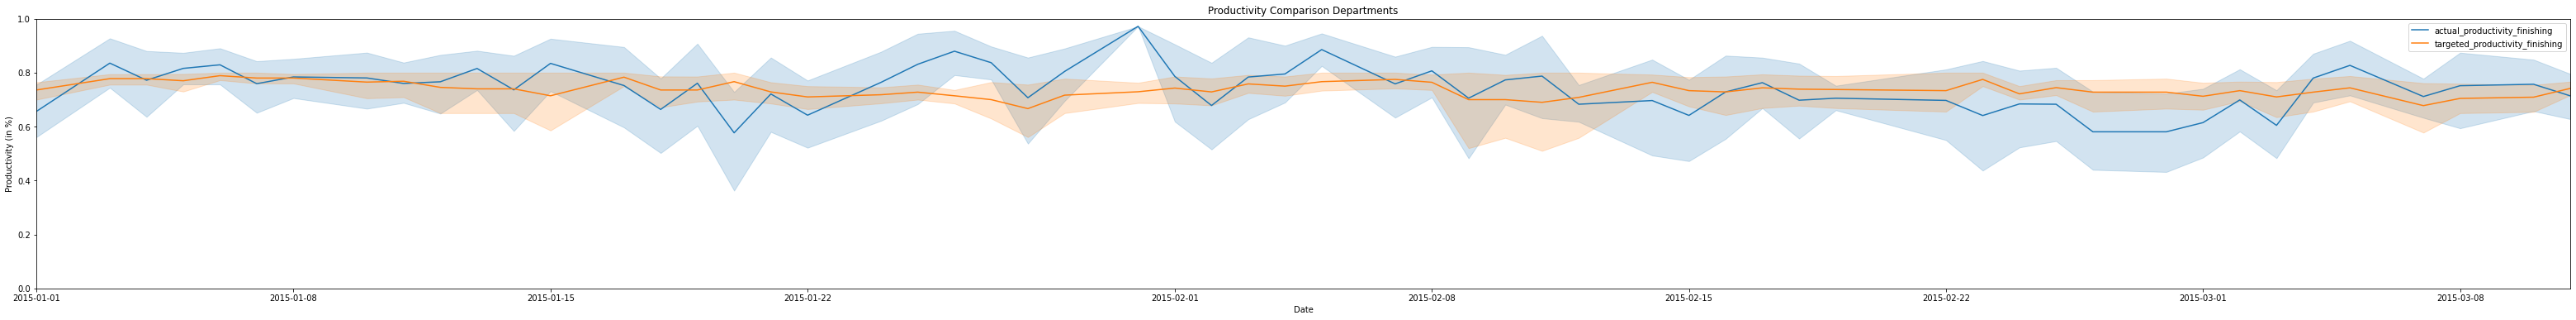

In [ ]:
plt.figure(figsize=(55, 6))
sns.lineplot(data=df_derivedAttributesAdded.loc[df_derivedAttributesAdded['department'] == 'sweing'], x='date', y='actual_productivity', label='actual_productivity_sweing')
sns.lineplot(data=df_derivedAttributesAdded.loc[df_derivedAttributesAdded['department'] == 'sweing'], x='date', y='targeted_productivity', label='targeted_productivity_sweing')

sns.lineplot(data=df_derivedAttributesAdded.loc[df_derivedAttributesAdded['department'] == 'finishing'], x='date', y='actual_productivity', label='actual_productivity_finishing')
sns.lineplot(data=df_derivedAttributesAdded.loc[df_derivedAttributesAdded['department'] == 'finishing'], x='date', y='targeted_productivity', label='targeted_productivity_finishing')

plt.title("Productivity Comparison Departments")
plt.xlabel("Date")
plt.ylabel("Productivity (in %)")
plt.legend()
plt.ylim(0, 1)
plt.xlim(min(df_derivedAttributesAdded['date']), max(df_derivedAttributesAdded['date']))
plt.show()

### Productivity Comparison Finishing Department Teams

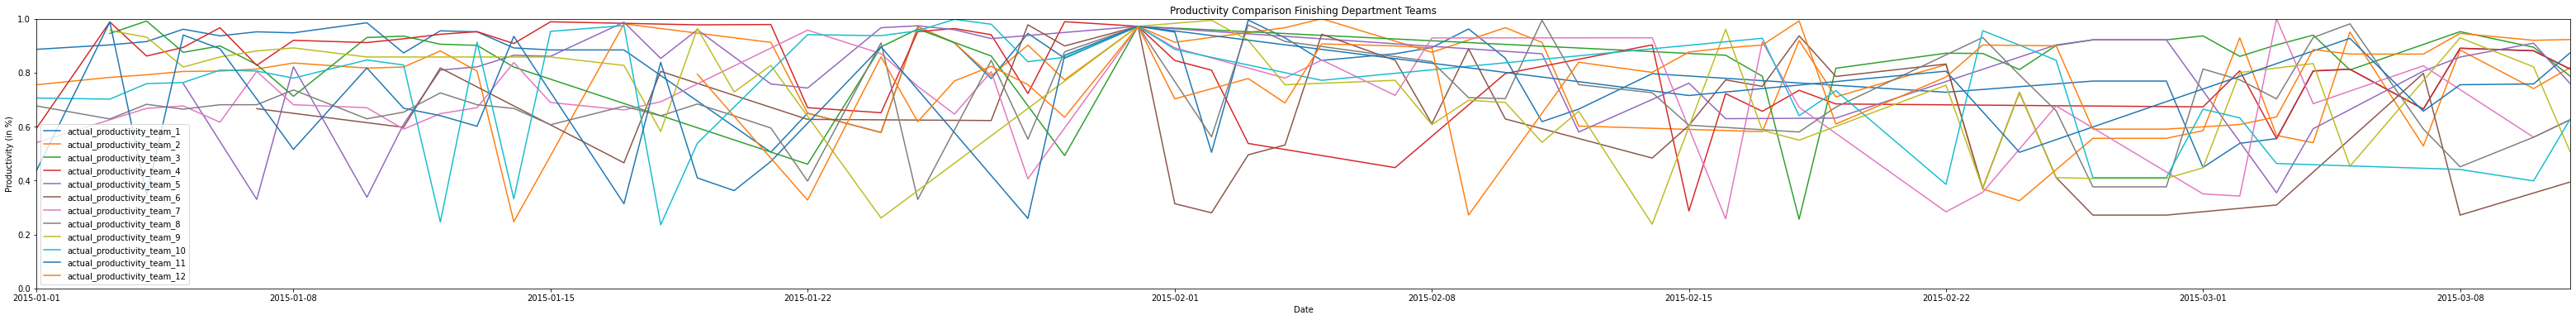

In [ ]:
plt.figure(figsize=(55, 6))

for i in range(1, len(df_derivedAttributesAdded['team']) + 1):
  sns.lineplot(data=df_derivedAttributesAdded.loc[(df_derivedAttributesAdded['department'] == 'finishing') & (df_derivedAttributesAdded['team'] == i)], x='date', y='actual_productivity', label='actual_productivity_team_%s' % (i))
  # sns.lineplot(data=df_derivedAttributesAdded.loc[(df_derivedAttributesAdded['department'] == 'finishing') & (df_derivedAttributesAdded['team'] == i)], x='date', y='targeted_productivity', label='targeted_productivity_team_%s' % (i))

plt.title("Productivity Comparison Finishing Department Teams")
plt.xlabel("Date")
plt.ylabel("Productivity (in %)")
plt.legend()
plt.ylim(0, 1)
plt.xlim(min(df_derivedAttributesAdded['date']), max(df_derivedAttributesAdded['date']))
plt.show()

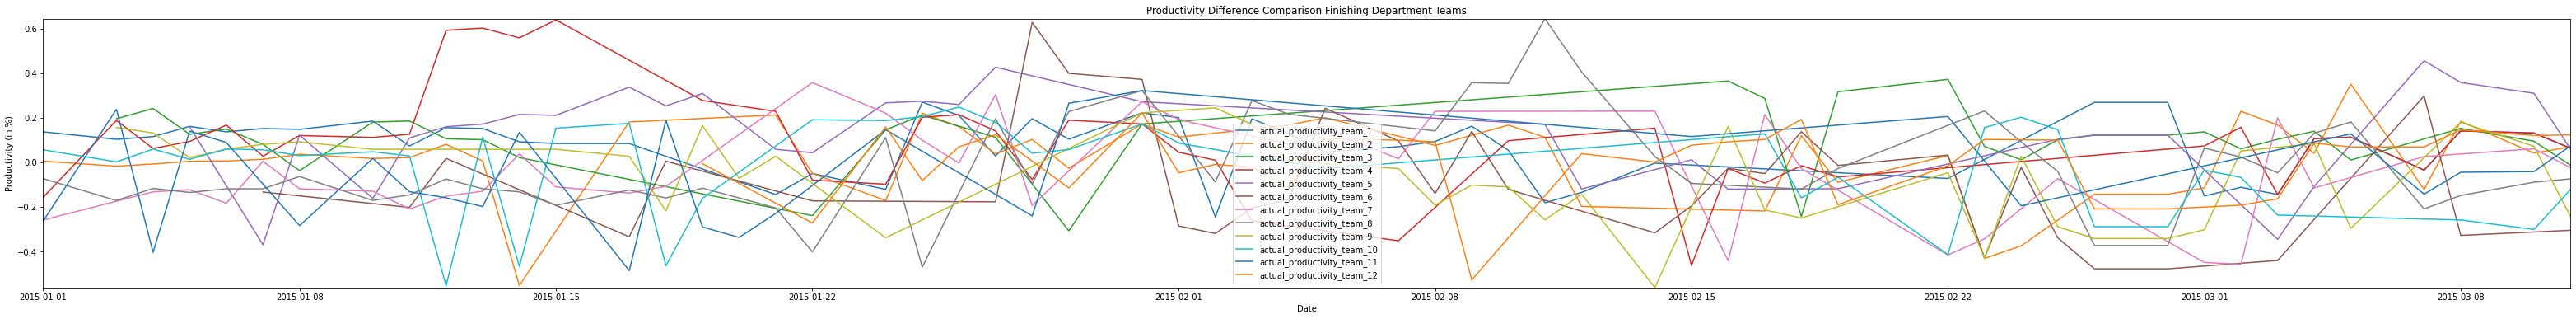

In [ ]:
plt.figure(figsize=(55, 6))

for i in range(1, len(df_derivedAttributesAdded['team']) + 1):
  sns.lineplot(data=df_derivedAttributesAdded.loc[(df_derivedAttributesAdded['department'] == 'finishing') & (df_derivedAttributesAdded['team'] == i)], x='date', y='productivity_difference', label='actual_productivity_team_%s' % (i))

plt.title("Productivity Difference Comparison Finishing Department Teams")
plt.xlabel("Date")
plt.ylabel("Productivity (in %)")
plt.legend()
plt.ylim(min(df_derivedAttributesAdded['productivity_difference']), max(df_derivedAttributesAdded['productivity_difference']))
plt.xlim(min(df_derivedAttributesAdded['date']), max(df_derivedAttributesAdded['date']))
plt.show()

### Productivity Comparison Sweing Department Teams

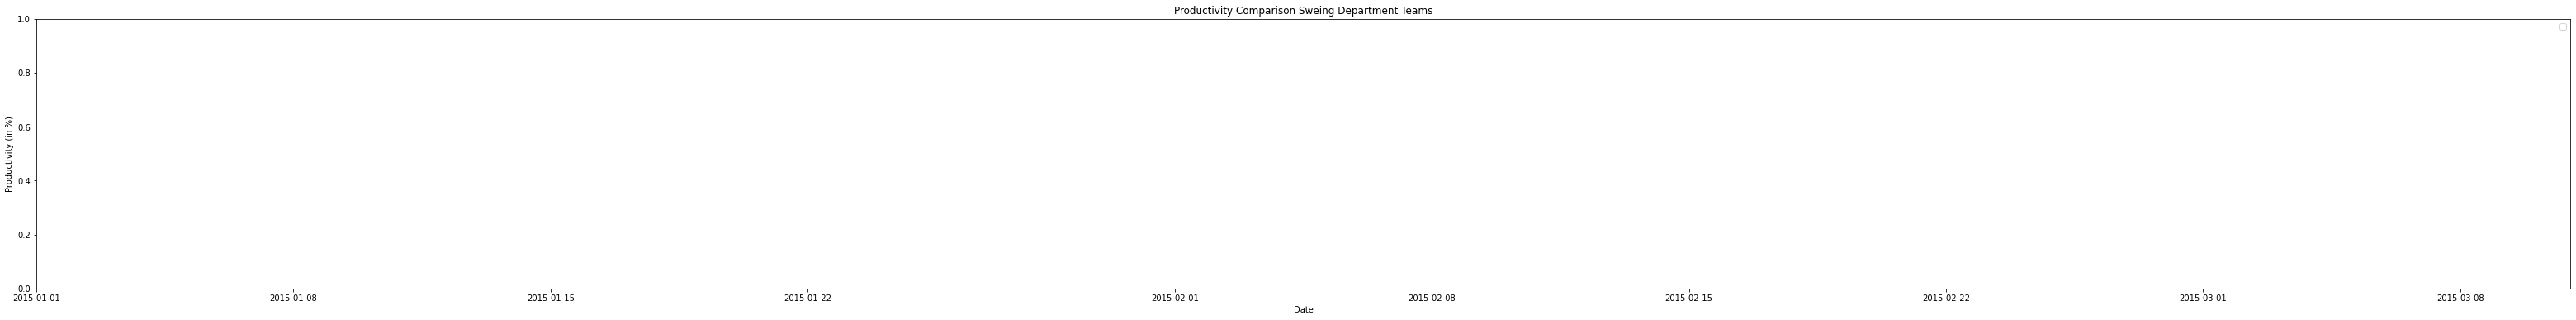

In [ ]:
### Productivity Comparison Sweing Department Teams
plt.figure(figsize=(55, 6))

for i in range(1, len(df_derivedAttributesAdded['team']) + 1):
  sns.lineplot(data=df_derivedAttributesAdded.loc[(df_derivedAttributesAdded['department'] == 'sweing') & (df_derivedAttributesAdded['team'] == i)], x='date', y='actual_productivity', label='actual_productivity_team_%s' % (i))
  # sns.lineplot(data=df_derivedAttributesAdded.loc[(df_derivedAttributesAdded['department'] == 'sweing') & (df_derivedAttributesAdded['team'] == i)], x='date', y='targeted_productivity', label='targeted_productivity_team_%s' % (i))

plt.title("Productivity Comparison Sweing Department Teams")
plt.xlabel("Date")
plt.ylabel("Productivity (in %)")
plt.legend()
plt.ylim(0, 1)
plt.xlim(min(df_derivedAttributesAdded['date']), max(df_derivedAttributesAdded['date']))
plt.show()

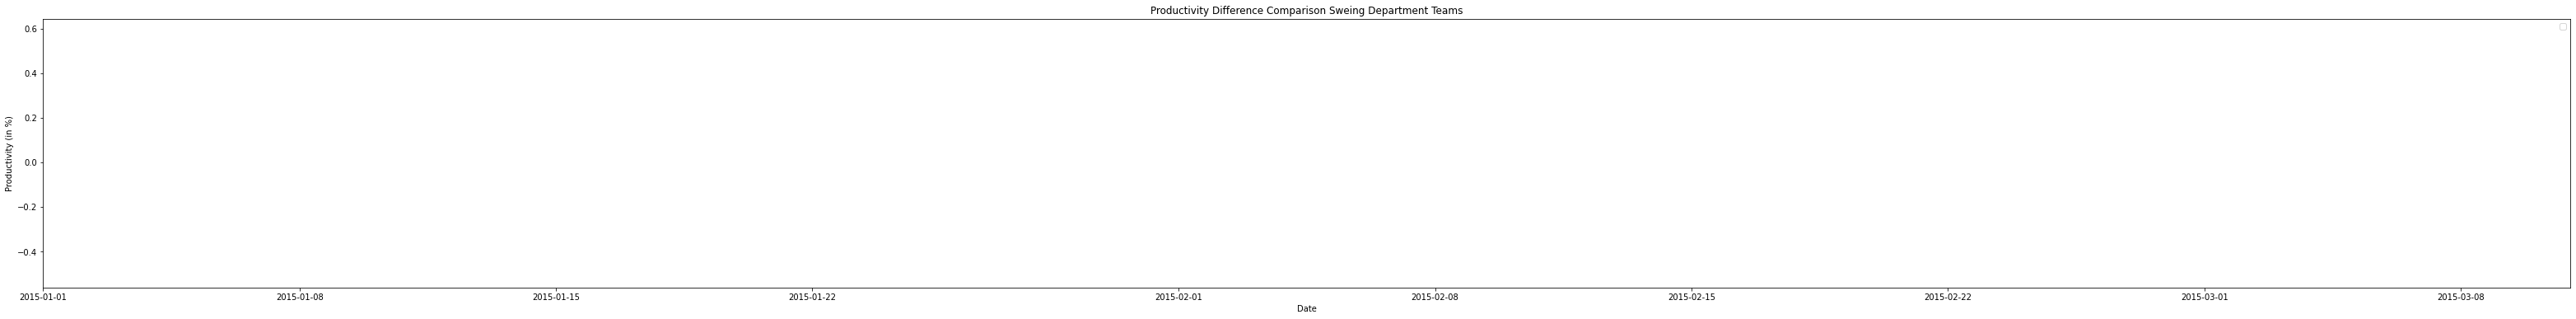

In [ ]:
### Productivity Difference Comparison Sweing Department Teams
plt.figure(figsize=(55, 6))

for i in range(1, len(df_derivedAttributesAdded['team']) + 1):
  sns.lineplot(data=df_derivedAttributesAdded.loc[(df_derivedAttributesAdded['department'] == 'sweing') & (df_derivedAttributesAdded['team'] == i)], x='date', y='productivity_difference', label='actual_productivity_team_%s' % (i))

plt.title("Productivity Difference Comparison Sweing Department Teams")
plt.xlabel("Date")
plt.ylabel("Productivity (in %)")
plt.legend()
plt.ylim(min(df_derivedAttributesAdded['productivity_difference']), max(df_derivedAttributesAdded['productivity_difference']))
plt.xlim(min(df_derivedAttributesAdded['date']), max(df_derivedAttributesAdded['date']))
plt.show()

### Idle time

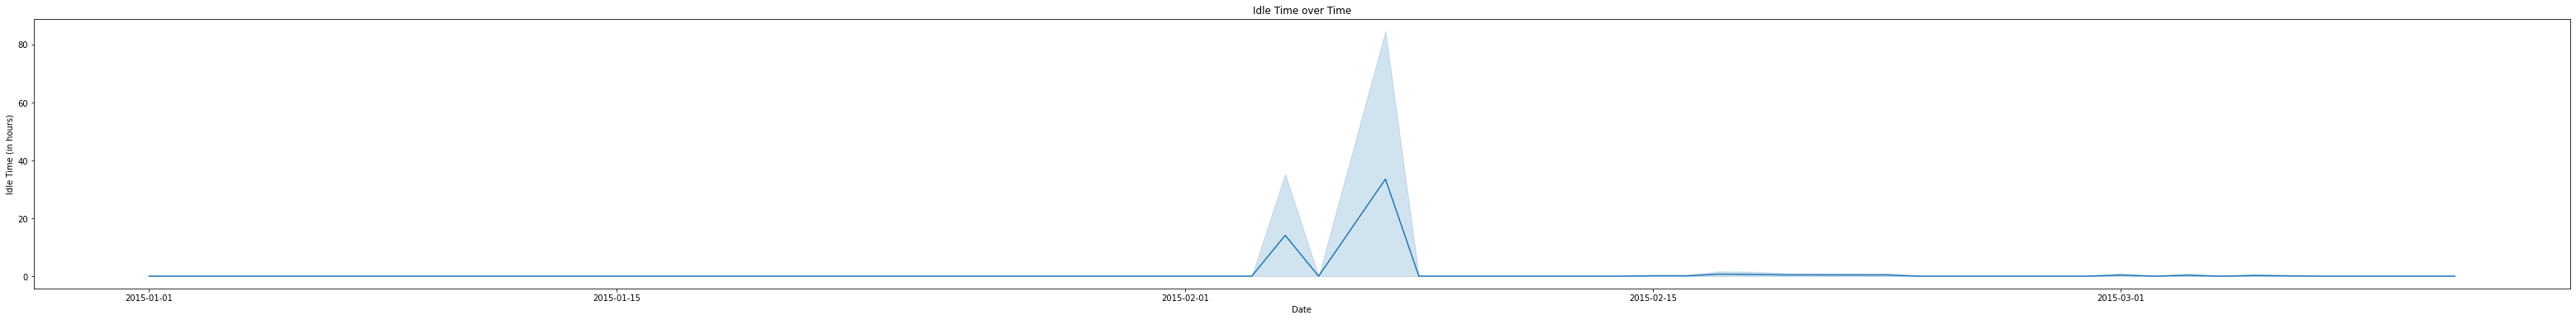

In [ ]:
plt.figure(figsize=(55, 6))
sns.lineplot(data=df_derivedAttributesAdded, x='date', y='idle_time')
plt.title("Idle Time over Time")
plt.xlabel("Date")
plt.ylabel("Idle Time (in hours)")
plt.show()

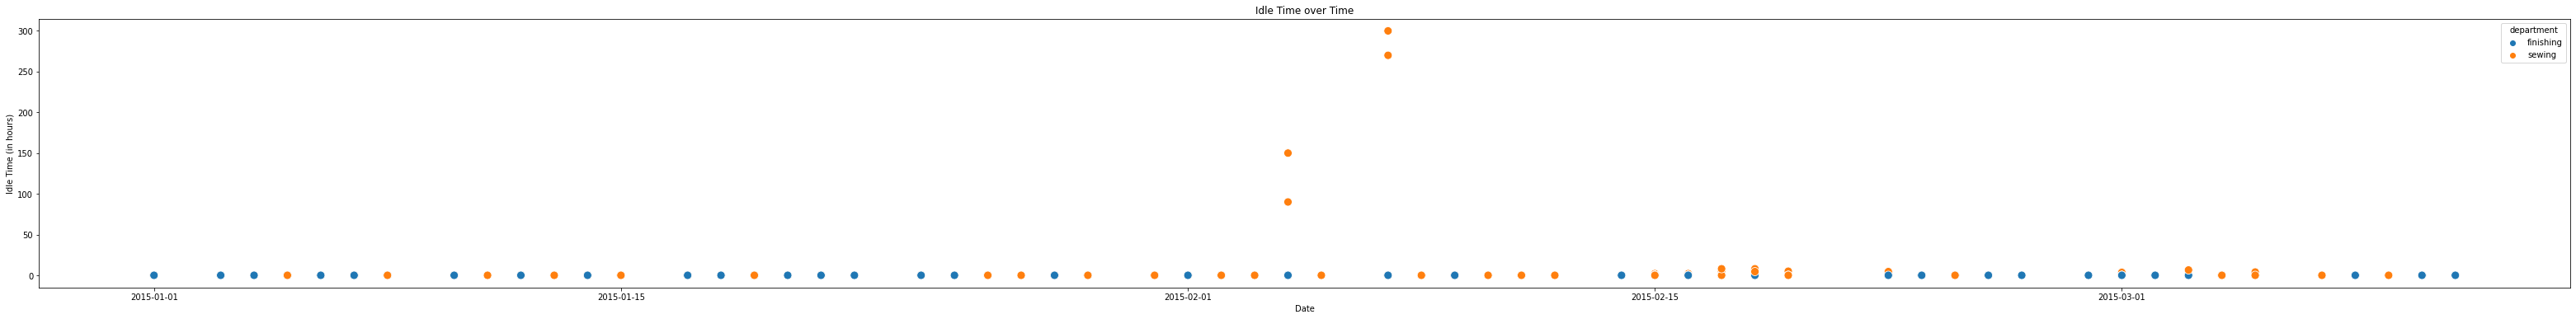

In [ ]:
plt.figure(figsize=(55, 6))
sns.scatterplot(data=df_derivedAttributesAdded, x='date', y='idle_time', hue='department', s=100)
# sns.lineplot(data=df_derivedAttributesAdded, x='date', y='idle_time',hue='department')
plt.title("Idle Time over Time")
plt.xlabel("Date")
plt.ylabel("Idle Time (in hours)")
plt.show()


### Division of staff members into departments

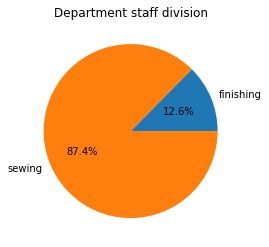

In [ ]:
data = df_derivedAttributesAdded.groupby(['department']).no_of_workers.sum()
data.plot.pie(title='Department staff division',autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

# Data preparation for ML

## Encode categorical data

In [ ]:
df_derivedAttributesAdded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1141 non-null   datetime64[ns]
 1   seven_day_interval       1141 non-null   category      
 2   department               1141 non-null   category      
 3   day                      1141 non-null   category      
 4   team                     1141 non-null   category      
 5   targeted_productivity    1141 non-null   Float64       
 6   smv                      1141 non-null   Float64       
 7   wip                      1141 non-null   Int64         
 8   over_time                1141 non-null   Int64         
 9   incentive                1141 non-null   Int64         
 10  idle_time                1141 non-null   Float64       
 11  idle_men                 1141 non-null   Int64         
 12  no_of_style_change       1141 non-

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder object
le = LabelEncoder()

In [ ]:
# Iterate through data frame
for i in range(df_derivedAttributesAdded.shape[1]):
    # check if data type of current column is 'category'
    if df_derivedAttributesAdded.dtypes[i]=='category':
        # applies the fit_transform function from the "le" object on the current column and assigns the transformed values back to the current column in the dataframe
        df_derivedAttributesAdded[df_derivedAttributesAdded.columns[i]] = le.fit_transform(df_derivedAttributesAdded[df_derivedAttributesAdded.columns[i]])

In [ ]:
# Sample of newly created data frame
df_derivedAttributesAdded.sample(10)

,date,seven_day_interval,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference,items_per_worker
289,2015-01-17,2,1,4,1,0.6,22.94,865,6570,23,0.0,0,0,56.5,0.770114,0.170114,15.309735
474,2015-01-27,3,0,1,5,0.8,2.9,0,960,0,0.0,0,0,8.0,0.6225,-0.1775,0.0
701,2015-02-10,1,0,1,3,0.7,4.15,0,1800,0,0.0,0,0,15.0,0.796756,0.096756,0.0
988,2015-03-01,0,1,5,7,0.75,29.4,622,6240,56,0.0,0,0,57.0,0.75075,0.00075,10.912281
813,2015-02-17,2,1,1,10,0.7,11.41,1054,3420,30,0.0,0,2,56.0,0.700614,0.000614,18.821429
936,2015-02-25,3,0,2,6,0.75,4.6,0,960,0,0.0,0,0,8.0,0.676667,-0.073333,0.0
31,2015-01-03,0,1,4,6,0.8,25.9,1138,6720,38,0.0,0,0,56.0,0.800125,0.000125,20.321429
620,2015-02-05,0,1,3,9,0.8,22.52,1039,6720,113,0.0,0,0,56.0,0.999995,0.199995,18.553571
736,2015-02-12,1,1,3,4,0.75,30.1,610,7080,56,0.0,0,0,59.0,0.750799,0.000799,10.338983
727,2015-02-11,1,0,2,8,0.8,3.94,0,960,0,0.0,0,0,8.0,0.54175,-0.25825,0.0


# Modeling


## Split data set into train, test, validate sets

In [ ]:
# Split attributes in x and y - x shall not contain the to-be-predicted column actual_productivity_norm

# create x-split and drop actual_productivity_norm out of the x-set 
x = df_derivedAttributesAdded.drop(['actual_productivity', 'productivity_difference'], axis=1)

# create y-split from actual_productvitiy_norm
y = df_derivedAttributesAdded.actual_productivity

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training, testing, and validation sets (60,20,20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=42)

In [ ]:
# print # of values in x-set (matrix without actual_productivity_norm column)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

# print # of values in y-set (vector of actual_productivity_norm values)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(684, 15)
(228, 15)
(229, 15)
(684,)
(228,)
(229,)


## Scaling and encoding

In [ ]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer

In [ ]:
categorical_features = ['seven_day_interval', 'department', 'day', 'team']
transformer = make_column_transformer(
    (preprocessing.OneHotEncoder(), categorical_features),
    (preprocessing.StandardScaler(), ['smv', 'wip', 'over_time', 'incentive', 'no_of_style_change', 'no_of_workers', 'idle_men', 'idle_time']),
    remainder='passthrough',
    sparse_threshold=0,
    verbose_feature_names_out=False)
transformer.fit(x_train)

# Scale the data sets
x_train = pd.DataFrame(transformer.transform(x_train),
                       index=x_train.index,
                       columns=transformer.get_feature_names_out())

x_test = pd.DataFrame(transformer.transform(x_test),
                      index=x_test.index,
                      columns=transformer.get_feature_names_out())

x_val = pd.DataFrame(transformer.transform(x_val),
                     index=x_val.index,
                     columns=transformer.get_feature_names_out())

In [ ]:
x_test.sample(10)

,seven_day_interval_0,seven_day_interval_1,seven_day_interval_2,seven_day_interval_3,seven_day_interval_4,department_0,department_1,day_0,day_1,day_2,...,wip,over_time,incentive,no_of_style_change,no_of_workers,idle_men,idle_time,date,targeted_productivity,items_per_worker
626,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.005407,-0.939335,-0.841669,-0.370835,-0.991403,-0.125382,-0.065506,2015-02-05,0.8,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.005407,-1.088052,-0.841669,-0.370835,-1.170391,-0.125382,-0.065506,2015-01-01,0.75,0.0
953,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.852974,-0.381646,-0.841669,1.914312,0.79848,-0.125382,-0.065506,2015-02-26,0.7,30.596154
959,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.005407,-0.344467,-0.841669,-0.370835,-1.170391,-0.125382,-0.065506,2015-02-26,0.7,0.0
866,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.005407,0.101683,-0.841669,-0.370835,-0.633426,-0.125382,-0.065506,2015-02-22,0.8,0.0
980,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.006501,0.77091,-0.011295,4.199459,1.066962,-0.125382,-0.065506,2015-02-28,0.5,9.586207
485,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.872034,0.77091,2.335412,-0.370835,1.066962,-0.125382,-0.065506,2015-01-28,0.6,18.017241
1106,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.005407,-0.939335,-0.841669,-0.370835,-0.991403,-0.125382,-0.065506,2015-03-08,0.8,0.0
1017,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.674408,0.547834,0.782975,-0.370835,0.79848,-0.125382,-0.065506,2015-03-02,0.75,17.980769
430,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.322979,0.510655,0.602459,-0.370835,-0.006967,-0.125382,-0.065506,2015-01-25,0.7,38.117647


In [ ]:
x_test_no_date = x_test.drop(columns=['date'])
x_train_no_date = x_train.drop(columns=['date'])
x_val_no_date = x_val.drop(columns=['date'])

## Model evaluations

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
def get_performance_metrics(model):
    model_name = type(model).__name__
    print(f"Training {model_name} model...")
    model.fit(x_train_no_date, y_train)
    print(f"Completed {model_name} model training.")
    y_pred = model.predict(x_val_no_date)

    df_perf_metrics = pd.DataFrame(columns=[
    'MAE', 'MSE', 'RMSE', 'MAPE'
    ])

    df_perf_metrics.loc[model_name] = [
      '{0:,.5f}'.format(mean_absolute_error(y_val, y_pred)),
      '{0:,.5f}'.format(mean_squared_error(y_val, y_pred)),
      '{0:,.5f}'.format(sqrt(mean_squared_error(y_val, y_pred))),
      '{0:,.5f}'.format(mean_absolute_percentage_error(y_val, y_pred)),
    ]

    print("Completed {} model's performance assessment.".format(model_name))
    return df_perf_metrics

### Selecting and training regression models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

from sklearn.neural_network import MLPRegressor


models_list = [
    LinearRegression(),
    KNeighborsRegressor(),
    SVR(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=422),
    GradientBoostingRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    Ridge(),
    BayesianRidge(),
    MLPRegressor(random_state=42, max_iter=200)
]

df_perf_metrics = pd.concat([get_performance_metrics(model) for model in models_list],
                            axis=0)

df_perf_metrics

Training LinearRegression model...
Completed LinearRegression model training.
Completed LinearRegression model's performance assessment.
Training KNeighborsRegressor model...
Completed KNeighborsRegressor model training.
Completed KNeighborsRegressor model's performance assessment.
Training SVR model...
Completed SVR model training.
Completed SVR model's performance assessment.
Training DecisionTreeRegressor model...
Completed DecisionTreeRegressor model training.
Completed DecisionTreeRegressor model's performance assessment.
Training RandomForestRegressor model...


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

Completed RandomForestRegressor model training.
Completed RandomForestRegressor model's performance assessment.
Training GradientBoostingRegressor model...
Completed GradientBoostingRegressor model training.
Completed GradientBoostingRegressor model's performance assessment.
Training AdaBoostRegressor model...


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

Completed AdaBoostRegressor model training.
Completed AdaBoostRegressor model's performance assessment.
Training Ridge model...
Completed Ridge model training.
Completed Ridge model's performance assessment.
Training BayesianRidge model...
Completed BayesianRidge model training.
Completed BayesianRidge model's performance assessment.
Training MLPRegressor model...


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

Completed MLPRegressor model training.
Completed MLPRegressor model's performance assessment.


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

,MAE,MSE,RMSE,MAPE
LinearRegression,0.09213,0.01657,0.12874,0.15867
KNeighborsRegressor,0.10072,0.01991,0.14109,0.17580
SVR,0.10003,0.01920,0.13857,0.17903
DecisionTreeRegressor,0.07705,0.01701,0.13041,0.12778
RandomForestRegressor,0.07002,0.01267,0.11257,0.12407
GradientBoostingRegressor,0.07076,0.01217,0.11031,0.12756
AdaBoostRegressor,0.09412,0.01730,0.13151,0.15903
Ridge,0.09234,0.01658,0.12878,0.16013
BayesianRidge,0.09295,0.01681,0.12965,0.16216
MLPRegressor,0.12056,0.02686,0.16389,0.19932


## Hyperparameter tuning

### Random Search

#### Random Hyperparameter Grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [1, 10, 100, 400]

# Number of features to consider at every split
max_features = [4, 12, 15]

# Maximum number of levels in tree
max_depth = [2, 4, 10]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [1, 10, 100, 400], 'max_features': [4, 12, 15], 'max_depth': [2, 4, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4], 'bootstrap': [True]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train_no_date, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [2, 4, 10, None],
                                        'max_features': [4, 12, 15],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 10, 100, 400]},
                   random_state=42, verbose=2)

#### Evaluate Random Search

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    print('Model Performance')
    print('MAE:', mae)
    print('MSE:', mean_squared_error(test_labels, predictions)),
    print('RMSE:',sqrt(mean_squared_error(test_labels, predictions))),
    print('MAPE:',mean_absolute_percentage_error(test_labels, predictions)),
    
    return mae

In [ ]:
best_random = rf_random.best_estimator_
random_mae = evaluate(best_random, x_val_no_date, y_val)

Model Performance
MAE: 0.06918788342389734
MSE: 0.012120664666828075
RMSE: 0.11009389023387299
MAPE: 0.12418494206924535


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

In [ ]:
print('best parameters are:-', rf_random.best_params_)
print('best estimator is:- ', rf_random.best_estimator_)
print('best mae is:- ', random_mae)

best parameters are:- {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 15, 'max_depth': None, 'bootstrap': True}
best estimator is:-  RandomForestRegressor(max_features=15, n_estimators=400, random_state=42)
best mae is:-  0.06918788342389734


In [ ]:
base_model = RandomForestRegressor(random_state=422)
base_model.fit(x_train_no_date, y_train)
base_mae = evaluate(base_model, x_val_no_date, y_val)

Model Performance
MAE: 0.0700151700962969
MSE: 0.012673032495937783
RMSE: 0.11257456416054998
MAPE: 0.12406944944424673


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

In [ ]:
print('Improvement of {:0.2f}% with random hyperparameter tuning.'.format( 100 * (base_mae-random_mae) / base_mae))

Improvement of 1.18% with random hyperparameter tuning.


In [ ]:
results = rf_random.cv_results_

for i in range(len(results['params'])):
    params = results['params'][i]
    mean_test_score = results['mean_test_score'][i]
    std_test_score = results['std_test_score'][i]
    print(f'params: {params}, mean test score: {mean_test_score}, std test score: {std_test_score}')

params: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 12, 'max_depth': 2, 'bootstrap': True}, mean test score: 0.20495375300789195, std test score: 0.03296692162006263
params: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': 10, 'bootstrap': True}, mean test score: 0.37377906793896026, std test score: 0.041720804153977505
params: {'n_estimators': 1, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 12, 'max_depth': None, 'bootstrap': True}, mean test score: 0.13844235101293645, std test score: 0.0982174477861656
params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 12, 'max_depth': 2, 'bootstrap': True}, mean test score: 0.23809798030011764, std test score: 0.018123034145825355
params: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 12, 'max_depth': 10, 'bootstrap': True}, mean test score: 0.45243725800357854, 

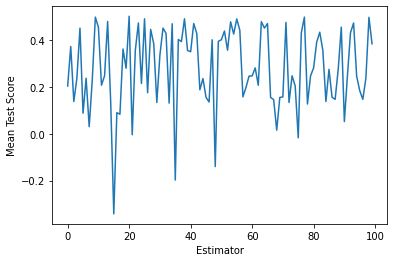

In [ ]:
# extract the mean test score for all the estimators
mean_test_scores = results['mean_test_score']

# create a line plot of the mean test score for all the estimators
plt.plot(mean_test_scores)
plt.xlabel('Estimator')
plt.ylabel('Mean Test Score')
plt.show()

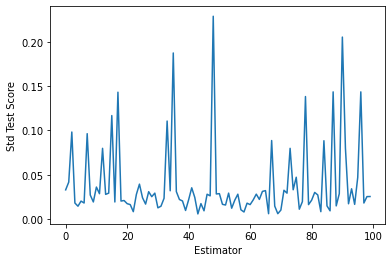

In [ ]:
# extract the std test score for all the estimators
std_test_scores = results['std_test_score']

# create a line plot of the std test score for all the estimators
plt.plot(std_test_scores)
plt.xlabel('Estimator')
plt.ylabel('Std Test Score')
plt.show()

#### Best parameters for Random Search

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 15,
 'max_depth': None,
 'bootstrap': True}

### Grid Search

#### Grid search with best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define hyperparameter space for grid search
# Create the parameter grid based on the results of random search 
param_grid_best = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': [15],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [400]
}
param_grid_best = {

}
# perform grid search
clf_gs_best = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                      param_grid=param_grid_best, 
                      cv = 3,
                      n_jobs = -1,
                      verbose = 2)
grid_search_best = clf_gs_best.fit(x_train_no_date, y_train)
# identify best hyperparameters and best score from grid search
print(f"GS Best hyperparameters: {grid_search_best.best_params_}")
print(f"GS Best score: {grid_search_best.best_score_}")
best_grid_best = grid_search_best.best_estimator_

print("\nModel performance on val dataset:")
grid_mae_best = evaluate(best_grid_best, x_val_no_date, y_val)

print("\nModel performance on test dataset:")
grid_mae_best_test = evaluate(best_grid_best, x_test_no_date, y_test)
print()

print('Improvement of {:0.2f}% on val dataset with Grid Search Hyperparameter Tuning.'.format( 100 * (base_mae - grid_mae_best) / base_mae))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
GS Best hyperparameters: {}
GS Best score: 0.47919098264816284

Model performance on val dataset:
Model Performance
MAE: 0.06738826669660254
MSE: 0.012058064592424199
RMSE: 0.10980921906845617
MAPE: 0.12040390948840003

Model performance on test dataset:
Model Performance
MAE: 0.08133055393796487
MSE: 0.01765226700540315
RMSE: 0.1328618342693008
MAPE: 0.14246647899336667

Improvement of 3.75% on val dataset with Grid Search Hyperparameter Tuning.


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

In [ ]:
results = grid_search_best.cv_results_

for i in range(len(results['params'])):
    params = results['params'][i]
    mean_test_score = results['mean_test_score'][i]
    std_test_score = results['std_test_score'][i]
    print(f'params: {params}, mean test score: {mean_test_score}, std test score: {std_test_score}')

params: {}, mean test score: 0.47919098264816284, std test score: 0.01827610573719528


## Predictions with best parameters

In [ ]:
len(x_test_no_date)

228

In [ ]:
x_test_no_date.iloc[0]

seven_day_interval_0          1.0
seven_day_interval_1          0.0
seven_day_interval_2          0.0
seven_day_interval_3          0.0
seven_day_interval_4          0.0
department_0                  1.0
department_1                  0.0
day_0                         0.0
day_1                         0.0
day_2                         0.0
day_3                         0.0
day_4                         1.0
day_5                         0.0
team_0                        0.0
team_1                        0.0
team_2                        0.0
team_3                        0.0
team_4                        1.0
team_5                        0.0
team_6                        0.0
team_7                        0.0
team_8                        0.0
team_9                        0.0
team_10                       0.0
team_11                       0.0
smv                     -1.018303
wip                     -1.005407
over_time               -0.641901
incentive               -0.841669
no_of_style_ch

In [ ]:
print("Real value:", y_test.iloc[1])
print("Predicted value:", best_grid_best.predict([x_test_no_date.iloc[1]])[0])

Real value: 0.9008
Predicted value: 0.8968205369500001


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### See how it performs on the first 10 values of the test dataset

In [ ]:
test_predictions = best_grid_best.predict(x_test_no_date.head(10))

In [ ]:
i = 0
for el in y_test.head(10):
  print('Predicted: %.2f' %(test_predictions[i]))
  print('Real: %.2f' %(el))
  print('Difference: %.2f' %(test_predictions[i] - el))
  print()
  i += 1

Predicted: 0.60
Real: 0.81
Difference: -0.21

Predicted: 0.90
Real: 0.90
Difference: -0.00

Predicted: 0.85
Real: 0.58
Difference: 0.27

Predicted: 0.78
Real: 0.85
Difference: -0.06

Predicted: 0.81
Real: 0.82
Difference: -0.01

Predicted: 0.62
Real: 0.60
Difference: 0.02

Predicted: 0.74
Real: 0.76
Difference: -0.03

Predicted: 0.82
Real: 0.95
Difference: -0.12

Predicted: 0.80
Real: 0.80
Difference: 0.00

Predicted: 0.61
Real: 0.67
Difference: -0.06



# Evaluation

## 5.a.) Apply the final model on the test data 

In [ ]:
opt_rfr_pred_test = best_grid_best.predict(x_test_no_date)
print('MAE on test dataset:', mean_absolute_error(y_test, opt_rfr_pred_test))
print('MSE on test dataset:', mean_squared_error(y_test, opt_rfr_pred_test)),
print('RMSE on test dataset:', sqrt(mean_squared_error(y_test, opt_rfr_pred_test))),
print('MAPE on test dataset:', mean_absolute_percentage_error(y_test, opt_rfr_pred_test)),

MAE on test dataset: 0.08133055393796487
MSE on test dataset: 0.01765226700540315
RMSE on test dataset: 0.1328618342693008
MAPE on test dataset: 0.14246647899336667


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

(None,)

## 5.b.) Retrain model on train + val data and test on test data and document performance

In [ ]:
grid_search_final = best_grid_best.fit(pd.concat([x_train_no_date, x_val_no_date]),
                                       pd.concat([y_train, y_val]))

print("\nFinal model performance on test dataset:")
grid_mae_best_final = evaluate(grid_search_final, x_test_no_date, y_test)
print()

print('Improvement of {:0.2f}% on test dataset after training the model with the train + val dataset.'.format( 100 * (grid_mae_best_test - grid_mae_best_final) / grid_mae_best_test))


Final model performance on test dataset:
Model Performance
MAE: 0.07693815473891227
MSE: 0.016330855171862224
RMSE: 0.12779223439576531
MAPE: 0.13411305864312104

Improvement of 5.40% on test dataset after training the model with the train + val dataset.


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

## Final performance metrics

In [ ]:
opt_rfr_pred_final = grid_search_final.predict(x_test_no_date)

print('Final performance metrics on test dataset:')
print('MAE:', mean_absolute_error(y_test, opt_rfr_pred_final))
print('MSE:', mean_squared_error(y_test, opt_rfr_pred_final))
print('RMSE:', sqrt(mean_squared_error(y_test, opt_rfr_pred_final)))
print('MAPE:', mean_absolute_percentage_error(y_test, opt_rfr_pred_final))

Final performance metrics on test dataset:
MAE: 0.07693815473891227
MSE: 0.016330855171862224
RMSE: 0.12779223439576531
MAPE: 0.13411305864312104


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

In [ ]:
opt_rfr_pred_final_train_test = grid_search_final.predict(pd.concat([x_train_no_date, x_val_no_date]))

print('Final performance metrics on final train dataset:')
print('MAE:', mean_absolute_error(pd.concat([y_train, y_val]), opt_rfr_pred_final_train_test))
print('MSE:', mean_squared_error(pd.concat([y_train, y_val]), opt_rfr_pred_final_train_test))
print('RMSE:', sqrt(mean_squared_error(pd.concat([y_train, y_val]), opt_rfr_pred_final_train_test)))
print('MAPE:', mean_absolute_percentage_error(pd.concat([y_train, y_val]), opt_rfr_pred_final_train_test))

Final performance metrics on final train dataset:
MAE: 0.027024779174074465
MSE: 0.0019957010897203586
RMSE: 0.044673270416663684
MAPE: 0.04964311702996359


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

## 5.c.) Base-line performance with trivial acceptor/rejector predictions

In [ ]:
# Calculate the mean of the target variable
trivial_predictions = [y_test.mean()]*len(y_test)

# Calculate the MAE, MSE, and RMSE
print('Base-line performance of the trivial acceptor/rejector')
print('MAE:', mean_absolute_error(y_test, trivial_predictions))
print('MSE:', mean_squared_error(y_test, trivial_predictions))
print('RMSE:', sqrt(mean_squared_error(y_test, trivial_predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, trivial_predictions))

Base-line performance of the trivial acceptor/rejector
MAE: 0.13043953952354573
MSE: 0.028139250226980245
RMSE: 0.1677475789005023
MAPE: 0.2300838010276633


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

## Manual check of some values

In [ ]:
test_predictions = grid_search_final.predict(x_test_no_date.head(20))

i = 0
for el in y_test.head(20):
  print('Predicted: %.2f' %(test_predictions[i]))
  print('Real: %.2f' %(el))
  print('Difference: %.2f' %(test_predictions[i] - el))
  print()
  i += 1

Predicted: 0.64
Real: 0.81
Difference: -0.16

Predicted: 0.90
Real: 0.90
Difference: 0.00

Predicted: 0.79
Real: 0.58
Difference: 0.21

Predicted: 0.76
Real: 0.85
Difference: -0.09

Predicted: 0.81
Real: 0.82
Difference: -0.01

Predicted: 0.60
Real: 0.60
Difference: -0.00

Predicted: 0.73
Real: 0.76
Difference: -0.03

Predicted: 0.88
Real: 0.95
Difference: -0.06

Predicted: 0.80
Real: 0.80
Difference: 0.00

Predicted: 0.64
Real: 0.67
Difference: -0.03

Predicted: 0.84
Real: 0.51
Difference: 0.33

Predicted: 0.76
Real: 0.96
Difference: -0.20

Predicted: 0.68
Real: 0.70
Difference: -0.02

Predicted: 0.81
Real: 0.85
Difference: -0.04

Predicted: 0.70
Real: 0.78
Difference: -0.09

Predicted: 0.82
Real: 0.46
Difference: 0.36

Predicted: 0.75
Real: 0.75
Difference: -0.00

Predicted: 0.72
Real: 0.33
Difference: 0.39

Predicted: 0.84
Real: 0.60
Difference: 0.24

Predicted: 0.45
Real: 0.45
Difference: 0.00



In [ ]:
x_test['date']

1091   2015-03-07
676    2015-02-09
413    2015-01-24
626    2015-02-05
157    2015-01-10
          ...    
1121   2015-03-08
1080   2015-03-05
752    2015-02-14
1106   2015-03-08
431    2015-01-25
Name: date, Length: 228, dtype: datetime64[ns]

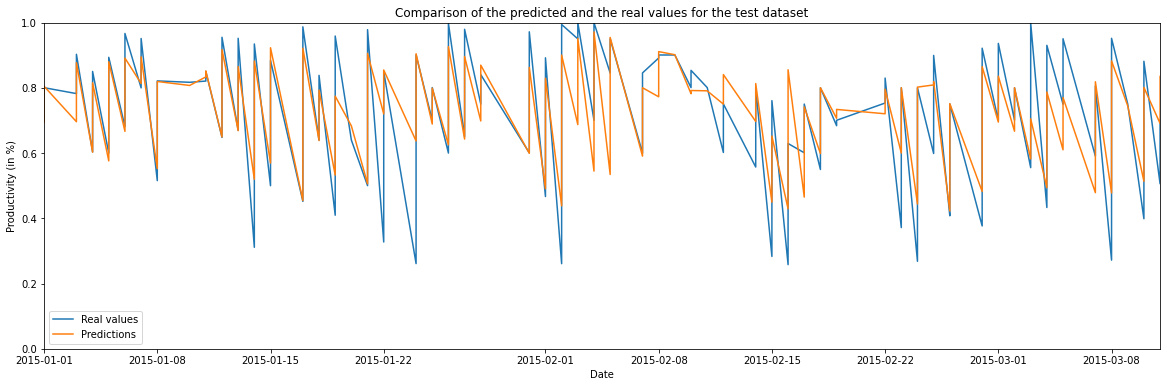

In [ ]:
plt.figure(figsize=(20, 6))

sorted_x, sorted_y_test = zip(*sorted(zip(x_test['date'], y_test.values)))
_, sorted_y_predicted = zip(*sorted(zip(x_test['date'], grid_search_final.predict(x_test_no_date))))

plt.plot(sorted_x, sorted_y_test, label='Real values')
plt.plot(sorted_x, sorted_y_predicted, label='Predictions')

plt.title("Comparison of the predicted and the real values for the test dataset")
plt.xlabel("Date")
plt.ylabel("Productivity (in %)")
plt.legend()
plt.ylim(0, 1)
plt.xlim(min(sorted_x), max(sorted_x))
plt.show()

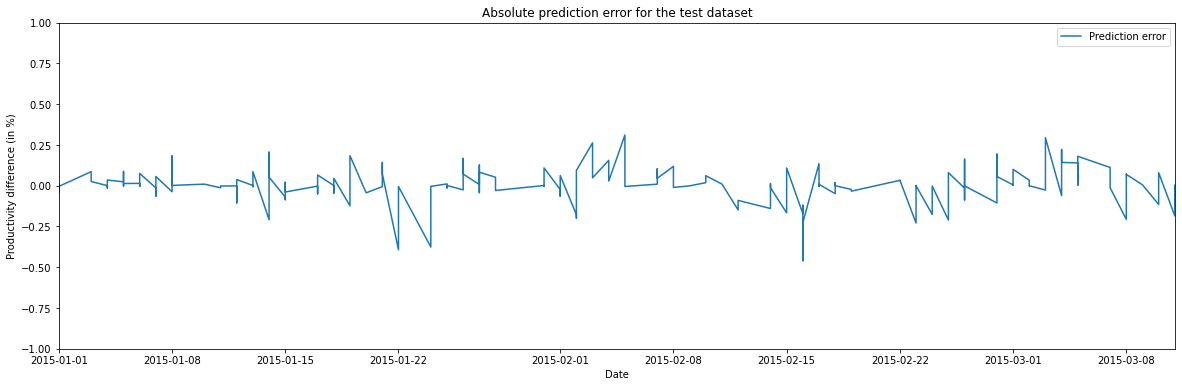

In [ ]:
plt.figure(figsize=(20, 6))

diff = [x1 - x2 for x1, x2 in zip(sorted_y_test, sorted_y_predicted)]

plt.plot(sorted_x, diff, label='Prediction error')

plt.title("Absolute prediction error for the test dataset")
plt.xlabel("Date")
plt.ylabel("Productivity difference (in %)")
plt.legend()
plt.ylim(-1, 1)
plt.xlim(min(sorted_x), max(sorted_x))
plt.show()

## 5.f.) Check if skewed performance in department attribute

In [ ]:
# department_0 == finishing
# department_1 == sewing
x_test_finishing = x_test_no_date.loc[x_test_no_date['department_0'] == 1]
x_test_sewing = x_test_no_date.loc[x_test_no_date['department_1'] == 1]
x_test_finishing

,seven_day_interval_0,seven_day_interval_1,seven_day_interval_2,seven_day_interval_3,seven_day_interval_4,department_0,department_1,day_0,day_1,day_2,...,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,idle_men,idle_time,targeted_productivity,items_per_worker
1091,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.018303,-1.005407,-0.641901,-0.841669,-0.370835,-1.080897,-0.125382,-0.065506,0.35,0.0
413,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.018303,-1.005407,-0.939335,-0.841669,-0.370835,-1.170391,-0.125382,-0.065506,0.7,0.0
626,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.018303,-1.005407,-0.939335,-0.841669,-0.370835,-0.991403,-0.125382,-0.065506,0.8,0.0
157,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.018303,-1.005407,-0.939335,-0.841669,-0.370835,-1.170391,-0.125382,-0.065506,0.8,0.0
76,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-1.113956,-1.005407,-1.088052,-0.841669,-0.370835,-1.170391,-0.125382,-0.065506,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-1.005427,-1.005407,-1.050873,-0.841669,-0.370835,-1.125644,-0.125382,-0.065506,0.75,0.0
101,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.113956,-1.005407,-0.939335,-0.841669,-0.370835,-1.170391,-0.125382,-0.065506,0.8,0.0
1042,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.018303,-1.005407,-0.344467,-0.841669,-0.370835,-1.170391,-0.125382,-0.065506,0.7,0.0
752,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.005427,-1.005407,-1.050873,-0.841669,-0.370835,-1.125644,-0.125382,-0.065506,0.8,0.0


In [ ]:
y_test_finishing = y_test.loc[x_test_finishing.index]
y_test_finishing

1091     0.80575
413     0.578314
626     0.845458
157     0.817102
76      0.763375
          ...   
571     0.740444
101     0.681061
1042    0.555431
752     0.800889
1106    0.951944
Name: actual_productivity, Length: 105, dtype: Float64

In [ ]:
y_test_sewing = y_test.loc[x_test_sewing.index]
y_test_sewing

676       0.9008
539     0.600711
136     0.800497
835     0.700096
47      0.850345
          ...   
1162    0.750608
622     0.950186
1121    0.700106
1080    0.750051
431     0.700251
Name: actual_productivity, Length: 123, dtype: Float64

In [ ]:
predictions_finishing = grid_search_final.predict(x_test_finishing)

print('Performance metrics on test dataset (just finishing values):')
print('MAE:', mean_absolute_error(y_test_finishing, predictions_finishing))
print('MSE:', mean_squared_error(y_test_finishing, predictions_finishing))
print('RMSE:', sqrt(mean_squared_error(y_test_finishing, predictions_finishing)))
print('MAPE:', mean_absolute_percentage_error(y_test_finishing, predictions_finishing))

Performance metrics on test dataset (just finishing values):
MAE: 0.1291368869063809
MSE: 0.030634811231550388
RMSE: 0.17502802984536617
MAPE: 0.2134039259671873


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

In [ ]:
predictions_sewing = grid_search_final.predict(x_test_sewing)

print('Performance metrics on test dataset (just sewing values):')
print('MAE:', mean_absolute_error(y_test_sewing, predictions_sewing))
print('MSE:', mean_squared_error(y_test_sewing, predictions_sewing))
print('RMSE:', sqrt(mean_squared_error(y_test_sewing, predictions_sewing)))
print('MAPE:', mean_absolute_percentage_error(y_test_sewing, predictions_sewing))

Performance metrics on test dataset (just sewing values):
MAE: 0.032378261425219546
MSE: 0.004120160974567458
RMSE: 0.06418848007678214
MAPE: 0.0664257328786742


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

### Base-line performance with trivial acceptor/rejector predictions for finishing department

In [ ]:
# Calculate the mean of the target variable
trivial_predictions_finishing = [y_test_finishing.mean()]*len(y_test_finishing)

# Calculate the MAE, MSE, and RMSE
print('Base-line performance of the trivial acceptor/rejector for finishing department')
print('MAE:', mean_absolute_error(y_test_finishing, trivial_predictions_finishing))
print('MSE:', mean_squared_error(y_test_finishing, trivial_predictions_finishing))
print('RMSE:', sqrt(mean_squared_error(y_test_finishing, trivial_predictions_finishing)))
print('MAPE:', mean_absolute_percentage_error(y_test_finishing, trivial_predictions_finishing))

Base-line performance of the trivial acceptor/rejector for finishing department
MAE: 0.1555608603776871
MSE: 0.03580918138993155
RMSE: 0.18923314030563343
MAPE: 0.27165568137704427


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 

### Base-line performance with trivial acceptor/rejector predictions for sewing department

In [ ]:
# Calculate the mean of the target variable
trivial_predictions_sewing = [y_test_sewing.mean()]*len(y_test_sewing)

# Calculate the MAE, MSE, and RMSE
print('Base-line performance of the trivial acceptor/rejector for sewing department')
print('MAE:', mean_absolute_error(y_test_sewing, trivial_predictions_sewing))
print('MSE:', mean_squared_error(y_test_sewing, trivial_predictions_sewing))
print('RMSE:', sqrt(mean_squared_error(y_test_sewing, trivial_predictions_sewing)))
print('MAPE:', mean_absolute_percentage_error(y_test_sewing, trivial_predictions_sewing))

Base-line performance of the trivial acceptor/rejector for sewing department
MAE: 0.10673894508824115
MSE: 0.021054062621274114
RMSE: 0.14510018132750252
MAPE: 0.19316329559367462


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming 